# The Normal and Student's t distributions

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## The Normal distribution

Using the scipy stats library, create an `n_dist` object, an instance of the class [*scipy.stats.norm*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) which is itself an instance of the general class [*scipy.stats.rv_continuous*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html).

In [2]:
mu = 0
sigma = 2
n_dist = stats.norm(loc=mu , scale=sigma)

In [3]:
n_dist.pdf([-1, 0, 1])

array([0.17603266, 0.19947114, 0.17603266])

Create a *numpy.ndarray* that contains 200 evenly spaced numbers over the interval $[-10, 10]$.  
<https://numpy.org/doc/stable/reference/generated/numpy.linspace.html>

In [4]:
np.linspace(0, 5, 11)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [5]:
x = np.linspace(-10, 10, 200)

Use the `pdf()` method to plot the **Normal pdf** for the values of $\mu$ and $\sigma$.

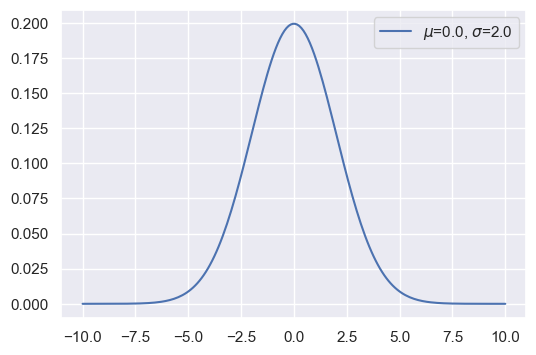

In [6]:
y = n_dist.pdf(x)
l = f"$\mu$={mu:.1f}, $\sigma$={sigma:.1f}"

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x, y, label=l)
ax.legend();

We store in a *list* of *tuple* the couples $(\mu, \sigma)$ for the Normal pdf that we want to plot.

In [8]:
params = [(0, 0.4), (0, 0.7), (0, 1.0), (0, 2.0), (-2, 0.7)]

Example of a loop over all the elements in `params`.

For each of these, create an `n_dist` object ans plot the pdf.

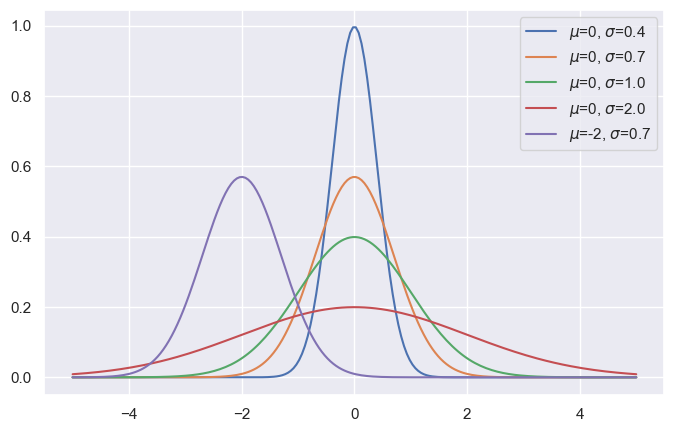

In [9]:
x = np.linspace(-5, 5, 200)

fig, ax = plt.subplots(figsize=(8,5))

for mu, sigma in params:
    n_dist = stats.norm(loc=mu, scale=sigma)
    y = n_dist.pdf(x)
    l = fr"$\mu$={mu:.0f}, $\sigma$={sigma:.1f}"
    ax.plot(x, y, label=l)
    
ax.legend();

## Student's $t$ distribution

Using the scipy stats library, create a `t_dist` object, an instance of the class [*scipy.stats.t*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html) which is itself an instance of the general class [*scipy.stats.rv_continuous*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html).

In [10]:
nu = 7
mu = 0
sigma = 2
t_dist = stats.t(df=nu, loc=mu, scale=sigma)

Use the `pdf()` method to plot the **Student's t pdf** for the values of $\nu$, $\mu$ and $\sigma$.

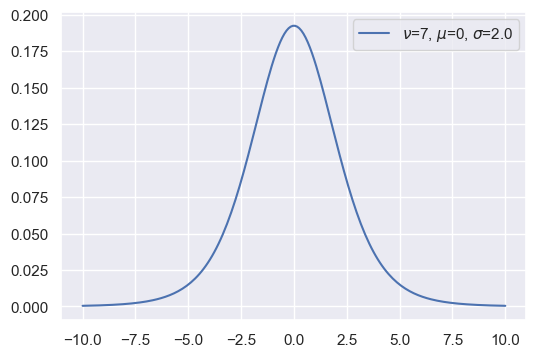

In [11]:
x = np.linspace(-10, 10, 200)
y = t_dist.pdf(x)
l = fr"$\nu$={nu:.0f}, $\mu$={mu:.0f}, $\sigma$={sigma:.1f}"

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x, y, label=l)
ax.legend();

We store in a *list* the values of $\nu$ for the Student's t pdf that we want to plot.

In [13]:
params_t = [3, 4, 6, 50]

Loop over all the elements in `params_t`, create the `t_dist` object for each of these values of $\nu$. Add the standard Normal distribution for comparison.

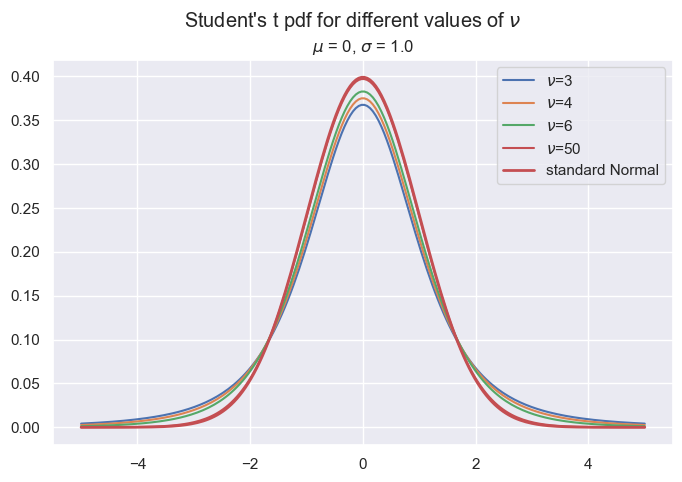

In [14]:
x = np.linspace(-5, 5, 200)
mu = 0
sigma = 1

fig, ax = plt.subplots(figsize=(8,5))

for nu in params_t:
    t_dist = stats.t(df=nu, loc=mu, scale=sigma)
    y = t_dist.pdf(x)
    l = fr"$\nu$={nu:.0f}"
    ax.plot(x, y, label=l)

y_norm = stats.norm.pdf(x)
ax.plot(x, y_norm, label='standard Normal', color='r', lw=2)

fig.suptitle(r"Student's t pdf for different values of $\nu$")
ax.set_title(fr"$\mu$ = {mu:.0f}, $\sigma$ = {sigma:.1f}")
ax.legend();

**Exercise**: The variance of the $t_\nu$ distribution is equal to $\nu / (\nu-2)$. How can you scale the pdf so that they all have variance equal to 1, as the standard Normal distribution?

**Solution**: If $X$ is a random variable with $t_\nu$ distribution, we need to find the scale factor $b$ such that the random variable $Y=bX$ has a variance equal to 1. The variance of $Y$ is
$$Var(Y)=Var(bX)=b^2 Var(X)=b^2 \frac{\nu}{\nu-2}$$
therefore
$$b = \sqrt{\frac{\nu-2}{\nu}}$$
There are two possibilities to apply this scaling factor:
1. Using the formula given in the slides
$$f_Y(x) = \frac{1}{|b|}f_X\Bigl(\frac{x}{b}\Bigr)$$
2. Change the scale factor parameter directly in the instantiation of the `scipy.stats.t` class.

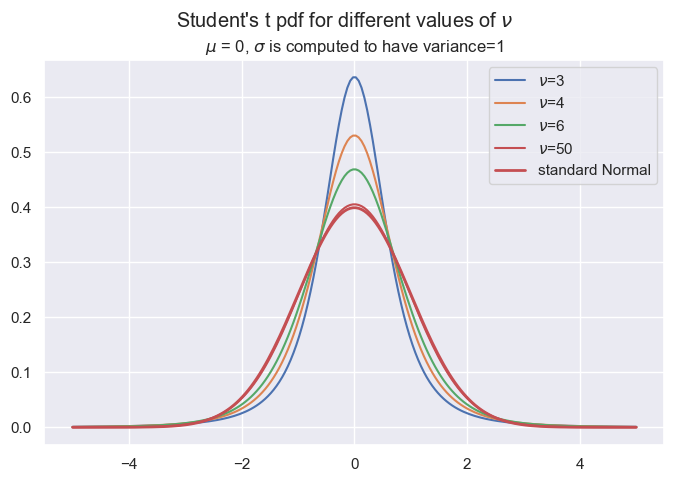

In [15]:
# solution 1

fig, ax = plt.subplots(figsize=(8,5))

for nu in params_t:
    t_dist = stats.t(df=nu, loc=mu, scale=sigma)
    scale = np.sqrt((nu-2)/nu)
    y = np.abs(1/scale) * t_dist.pdf(x/scale)
    l = fr"$\nu$={nu:.0f}"
    ax.plot(x, y, label=l)
    
y_norm = stats.norm.pdf(x)
ax.plot(x, y_norm, label='standard Normal', color='r', lw=2)

fig.suptitle(r"Student's t pdf for different values of $\nu$")
ax.set_title(fr"$\mu$ = {mu:.0f}, $\sigma$ is computed to have variance=1")
ax.legend();

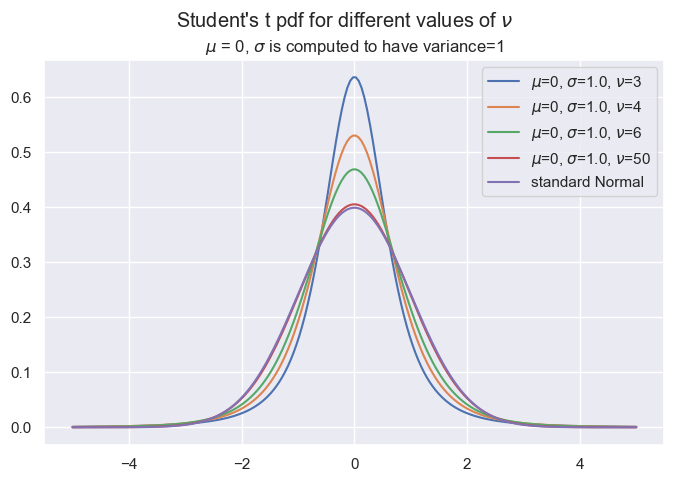

In [12]:
# solution 2

fig, ax = plt.subplots(figsize=(8,5))

for nu in params_t:
    t_dist = stats.t(df=nu, loc=mu, scale=np.sqrt((nu-2)/nu))
    y = t_dist.pdf(x)
    l = fr"$\mu$={mu:.0f}, $\sigma$={sigma:.1f}, $\nu$={nu:.0f}"
    ax.plot(x, y, label=l)

ax.plot(x, stats.norm.pdf(x), label='standard Normal', color='r')

fig.suptitle(r"Student's t pdf for different values of $\nu$")
ax.set_title(fr"$\mu$ = {mu:.0f}, $\sigma$ is computed to have variance=1")
ax.legend();

## Quantiles

Use the `ppf()` method of the class [*scipy.stats.rv_continuous*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html) to obtain the quantiles at the given percentiles.

In [16]:
percentiles = [0.75, 0.8, 0.9, 0.95, 0.975, 0.99, 0.995]

### Standard Normal distribution

In [18]:
norm_quantiles = stats.norm.ppf(percentiles)
norm_quantiles.round(4)

array([0.6745, 0.8416, 1.2816, 1.6449, 1.96  , 2.3263, 2.5758])

### $t$ distribution
We have a *list* with the degrees of freedom that we want to use. The output will be a one dimensional *array* per df. We put all these arrays in a *list* using the `list.append()` function.

In [21]:
df_list = [5, 10, 20, 50]
t_quantiles = []            # create an empty list
for nu in df_list:
    q = stats.t.ppf(percentiles, df=nu)
    t_quantiles.append(q)

t_quantiles

[array([0.72668684, 0.91954378, 1.47588405, 2.01504837, 2.57058184,
        3.36493   , 4.03214298]),
 array([0.69981206, 0.87905783, 1.37218364, 1.81246112, 2.22813885,
        2.76376946, 3.16927267]),
 array([0.6869545 , 0.85996444, 1.32534071, 1.72471824, 2.08596345,
        2.527977  , 2.84533971]),
 array([0.6794282 , 0.84886924, 1.29871369, 1.67590502, 2.00855911,
        2.40327192, 2.67779327])]

### Comparisons

In [22]:
indices = []
for df in df_list:
    indices.append(f"t distribution (df={df})")
indices.append("normal distribution")

quantiles = np.vstack([t_quantiles, norm_quantiles])

pd.DataFrame(data=quantiles,
             columns=[f"{p:.1%}" for p in percentiles],
             index=indices
            ).round(4)

,75.0%,80.0%,90.0%,95.0%,97.5%,99.0%,99.5%
t distribution (df=5),0.7267,0.9195,1.4759,2.0150,2.5706,3.3649,4.0321
t distribution (df=10),0.6998,0.8791,1.3722,1.8125,2.2281,2.7638,3.1693
t distribution (df=20),0.6870,0.8600,1.3253,1.7247,2.0860,2.5280,2.8453
t distribution (df=50),0.6794,0.8489,1.2987,1.6759,2.0086,2.4033,2.6778
normal distribution,0.6745,0.8416,1.2816,1.6449,1.9600,2.3263,2.5758


In [25]:
for x in range(10):
    print(x)

0
1
2
3
4
5
6
7
8
9


In [27]:
[x**2 for x in range(10)]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]